In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [9]:
dataset = pd.read_csv('forestfires.csv')
dataset.head()


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [10]:
dataset.shape

(517, 13)

In [11]:
cat_data = dataset.select_dtypes('object').columns.to_list()
num_data = dataset.columns.to_list()
for col in cat_data:
    num_data.remove(col)
num_data.remove('area')
print('the categoraical columns in the dataset is: ', cat_data)
print('the numerical columns in the dataset is: ', num_data)

the categoraical columns in the dataset is:  ['month', 'day']
the numerical columns in the dataset is:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


In [12]:
dataset.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [13]:
dataset.duplicated().sum()

4

In [14]:
dataset[dataset.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

In [15]:
data_no_dup = dataset.copy()
data_no_dup.drop_duplicates(inplace = True)
data_no_dup[data_no_dup.duplicated()]

Empty DataFrame
Columns: [X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: []

In [16]:
data_no_dup.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  513.000000  513.000000  513.000000  513.000000  513.000000  513.000000   
mean     4.678363    4.300195   90.637427  110.989279  549.155166    9.023587   
std      2.320059    1.230925    5.540920   64.191013  247.724594    4.575543   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  440.900000    6.400000   
50%      4.000000    4.000000   91.600000  108.300000  664.500000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   11.000000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  513.000000  513.000000  513.000000  513.000000   513.000000  
mean    18.887524   44.348928    4.010526    0.021832    12.891598  
std      5.828128   16.358803    1.796613    0.297107    63.892586  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.540000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

In [17]:
data_no_dup.describe(include = ['object'])

month  day
count    513  513
unique    12    7
top      aug  sun
freq     182   94

In [18]:
data_no_dup['log-area'] = np.log10(data_no_dup['area'] + 1)

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'log-area'}>]], dtype=object)

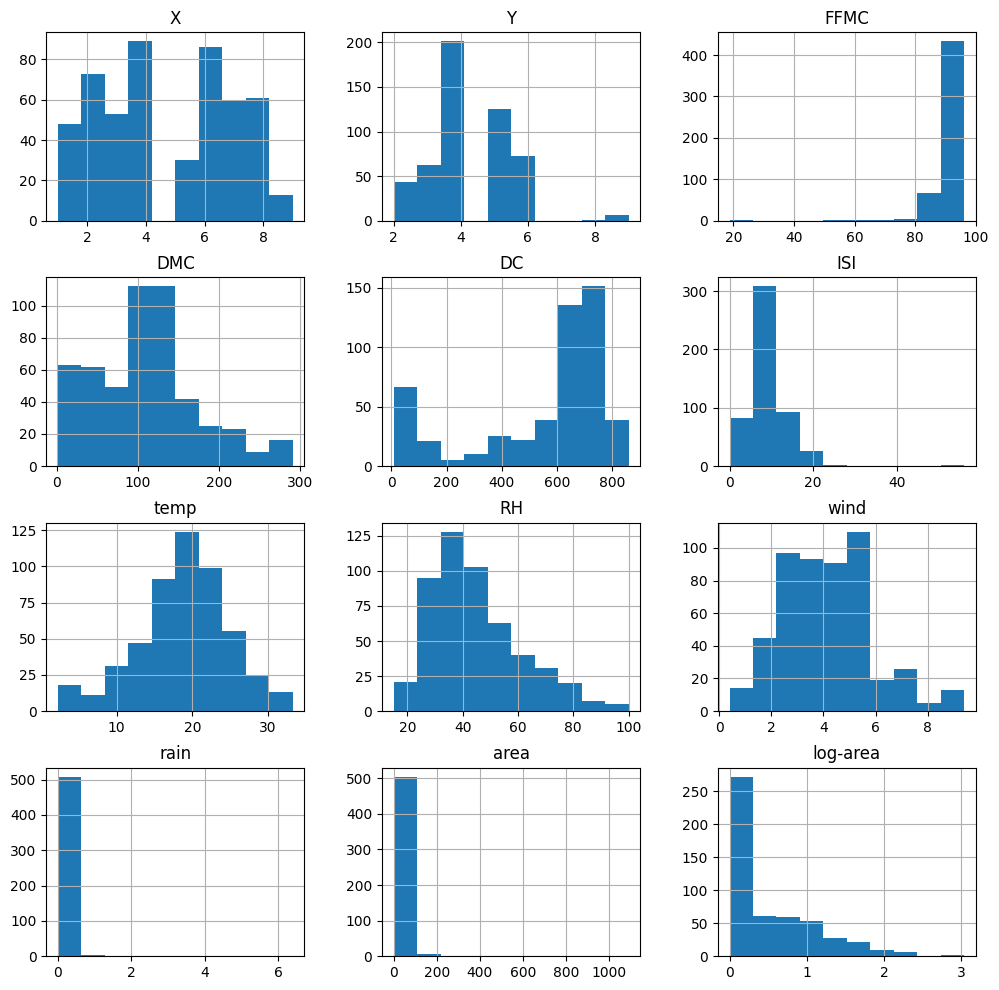

In [19]:
# display the histogram of all the columns
data_no_dup.hist(figsize = (12, 12))

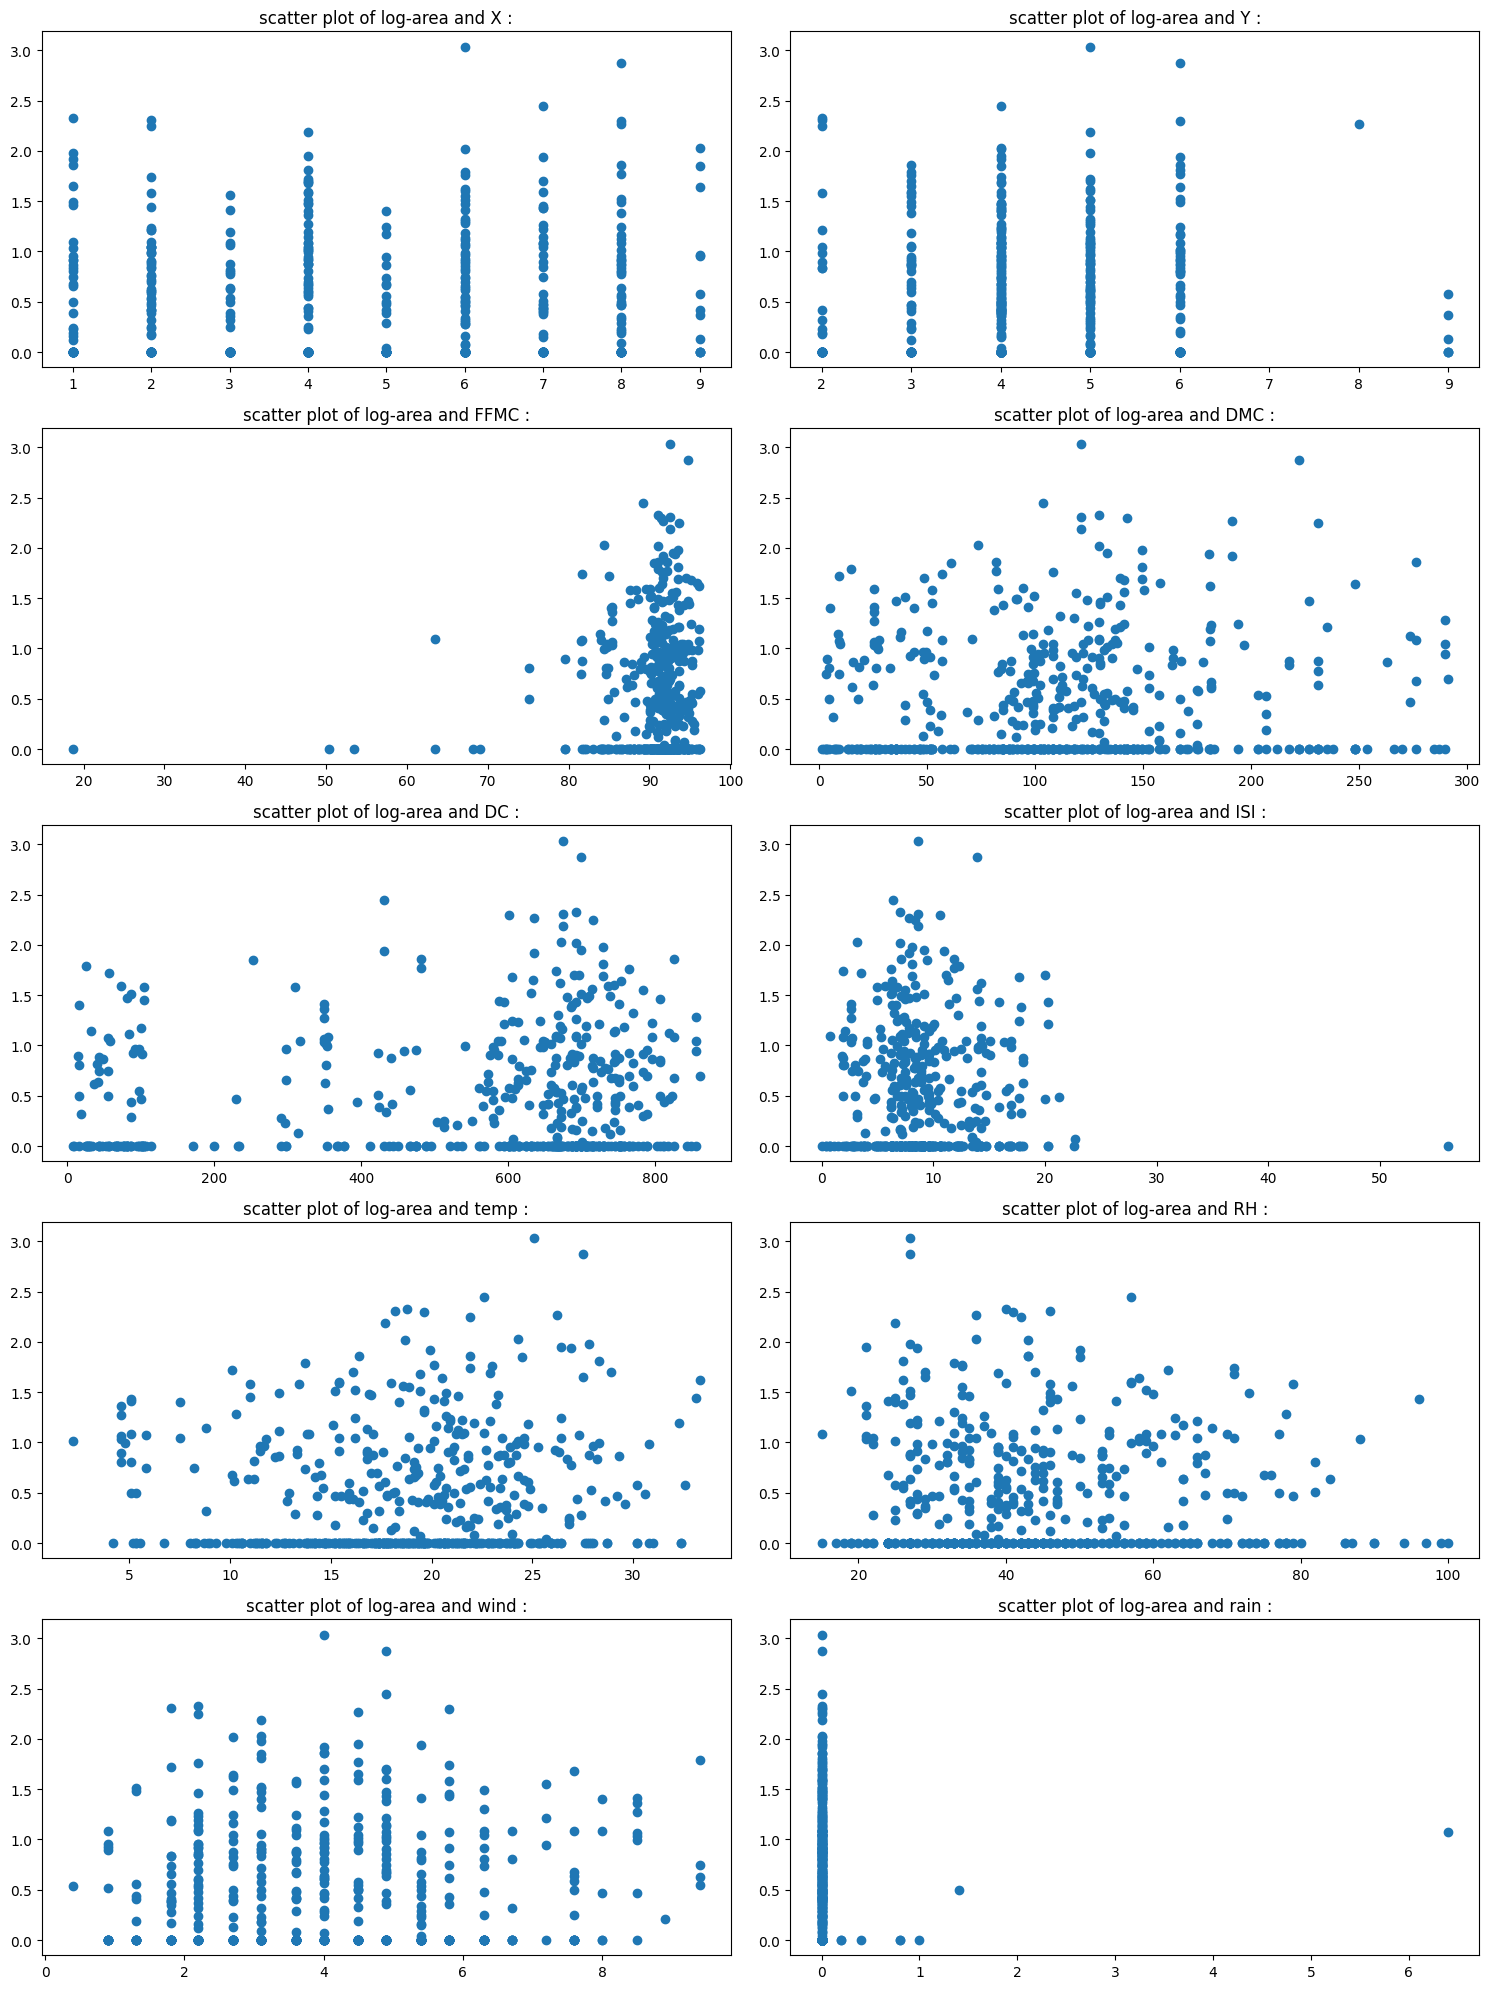

In [20]:
# DIsplay the scatter plot with x-axis as numerical columns and y-axis as log-area column
plt.figure(figsize = (15, 20))

for i, col in enumerate(data_no_dup[num_data].columns, 1):
    plt.subplot(5, 2, i)
    plt.title(f'scatter plot of log-area and {col} :')
    plt.scatter(data_no_dup[col], data_no_dup['log-area'])
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

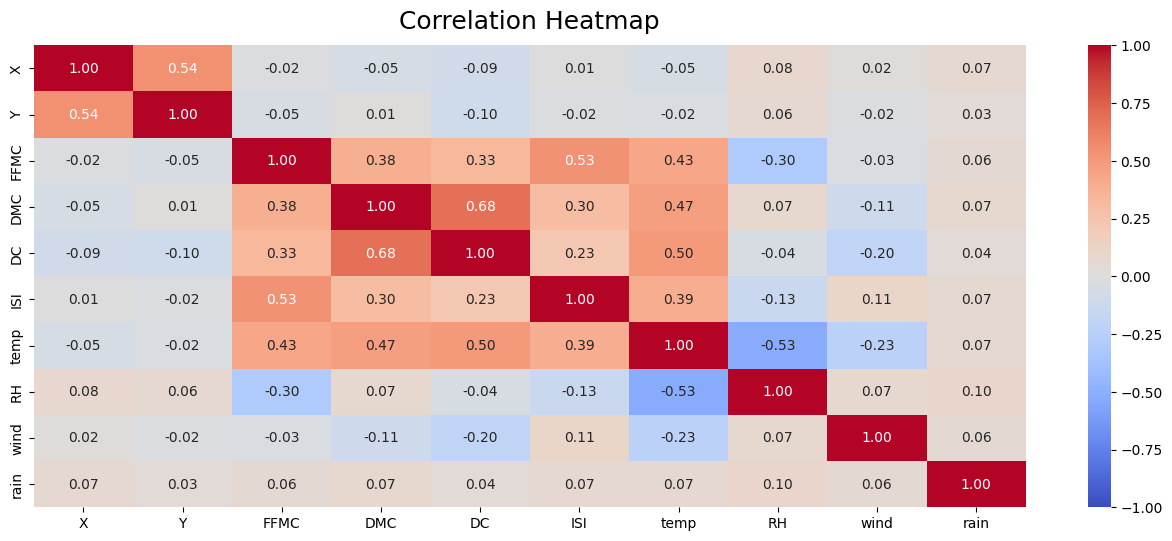

In [21]:
# correlation heatmap between features
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_no_dup[num_data].corr(), vmin = -1, vmax = 1, annot = True,fmt=".2f", cmap = 'coolwarm',annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

Skew: 12.802213419146321
Kurtosis: 192.73391233370953


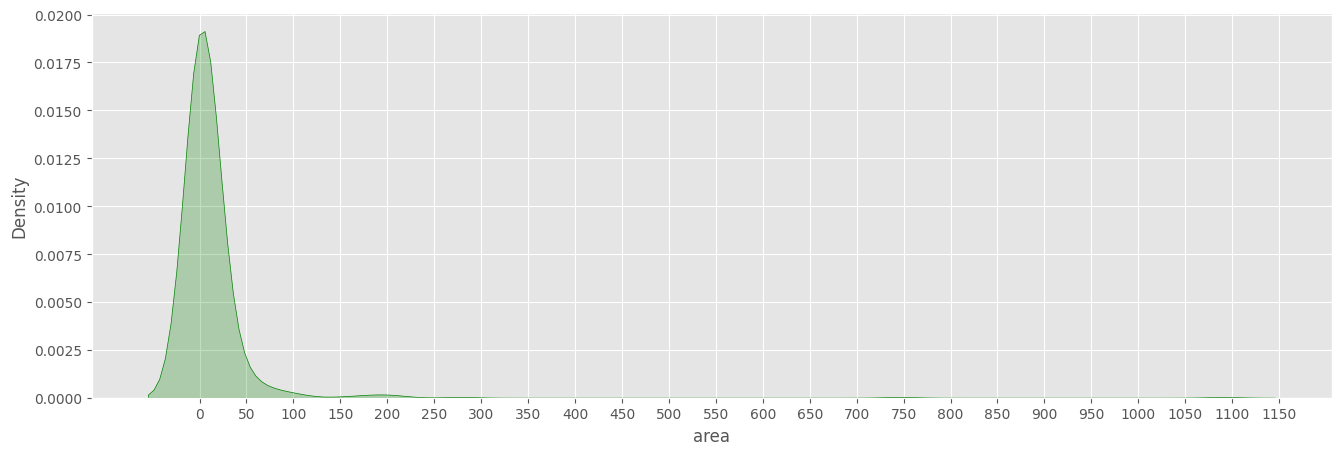

In [22]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize = (16, 5))
print("Skew: {}".format(data_no_dup['area'].skew()))
print("Kurtosis: {}".format(data_no_dup['area'].kurtosis()))
ax = sns.kdeplot(data_no_dup['area'],shade = True, color = 'g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.show()

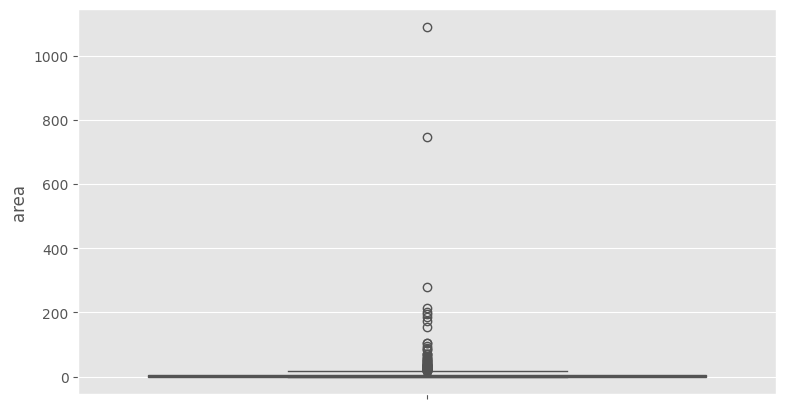

In [23]:
ax = sns.boxplot(data_no_dup['area'])

In [24]:
from scipy.stats import zscore
y_outliers = data_no_dup[abs(zscore(data_no_dup['area'])) >= 3 ]
y_outliers

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area  \
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53   

     log-area  
237  2.330170  
238  3.038159  
415  2.873483  
479  2.446428

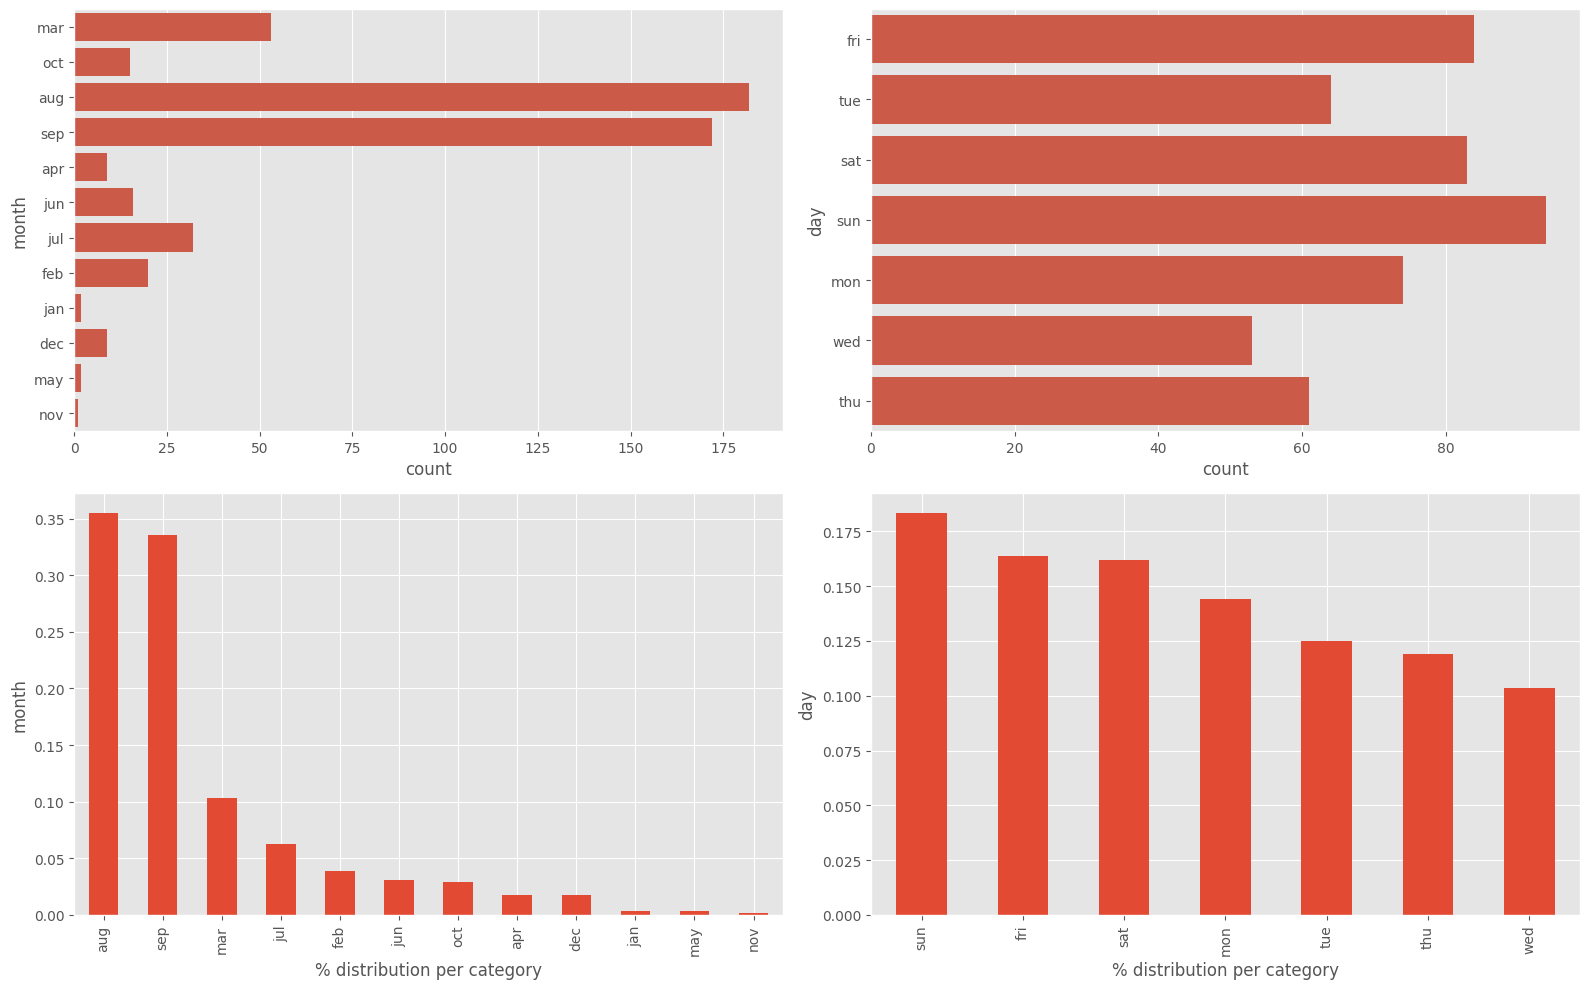

In [25]:
plt.figure(figsize = (16, 10))

for i,col in enumerate(cat_data, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = data_no_dup.drop('area', axis = 1), y = col)
    plt.subplot(2, 2, i+2)
    data_no_dup[col].value_counts(normalize = True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

plt.tight_layout()
plt.show()

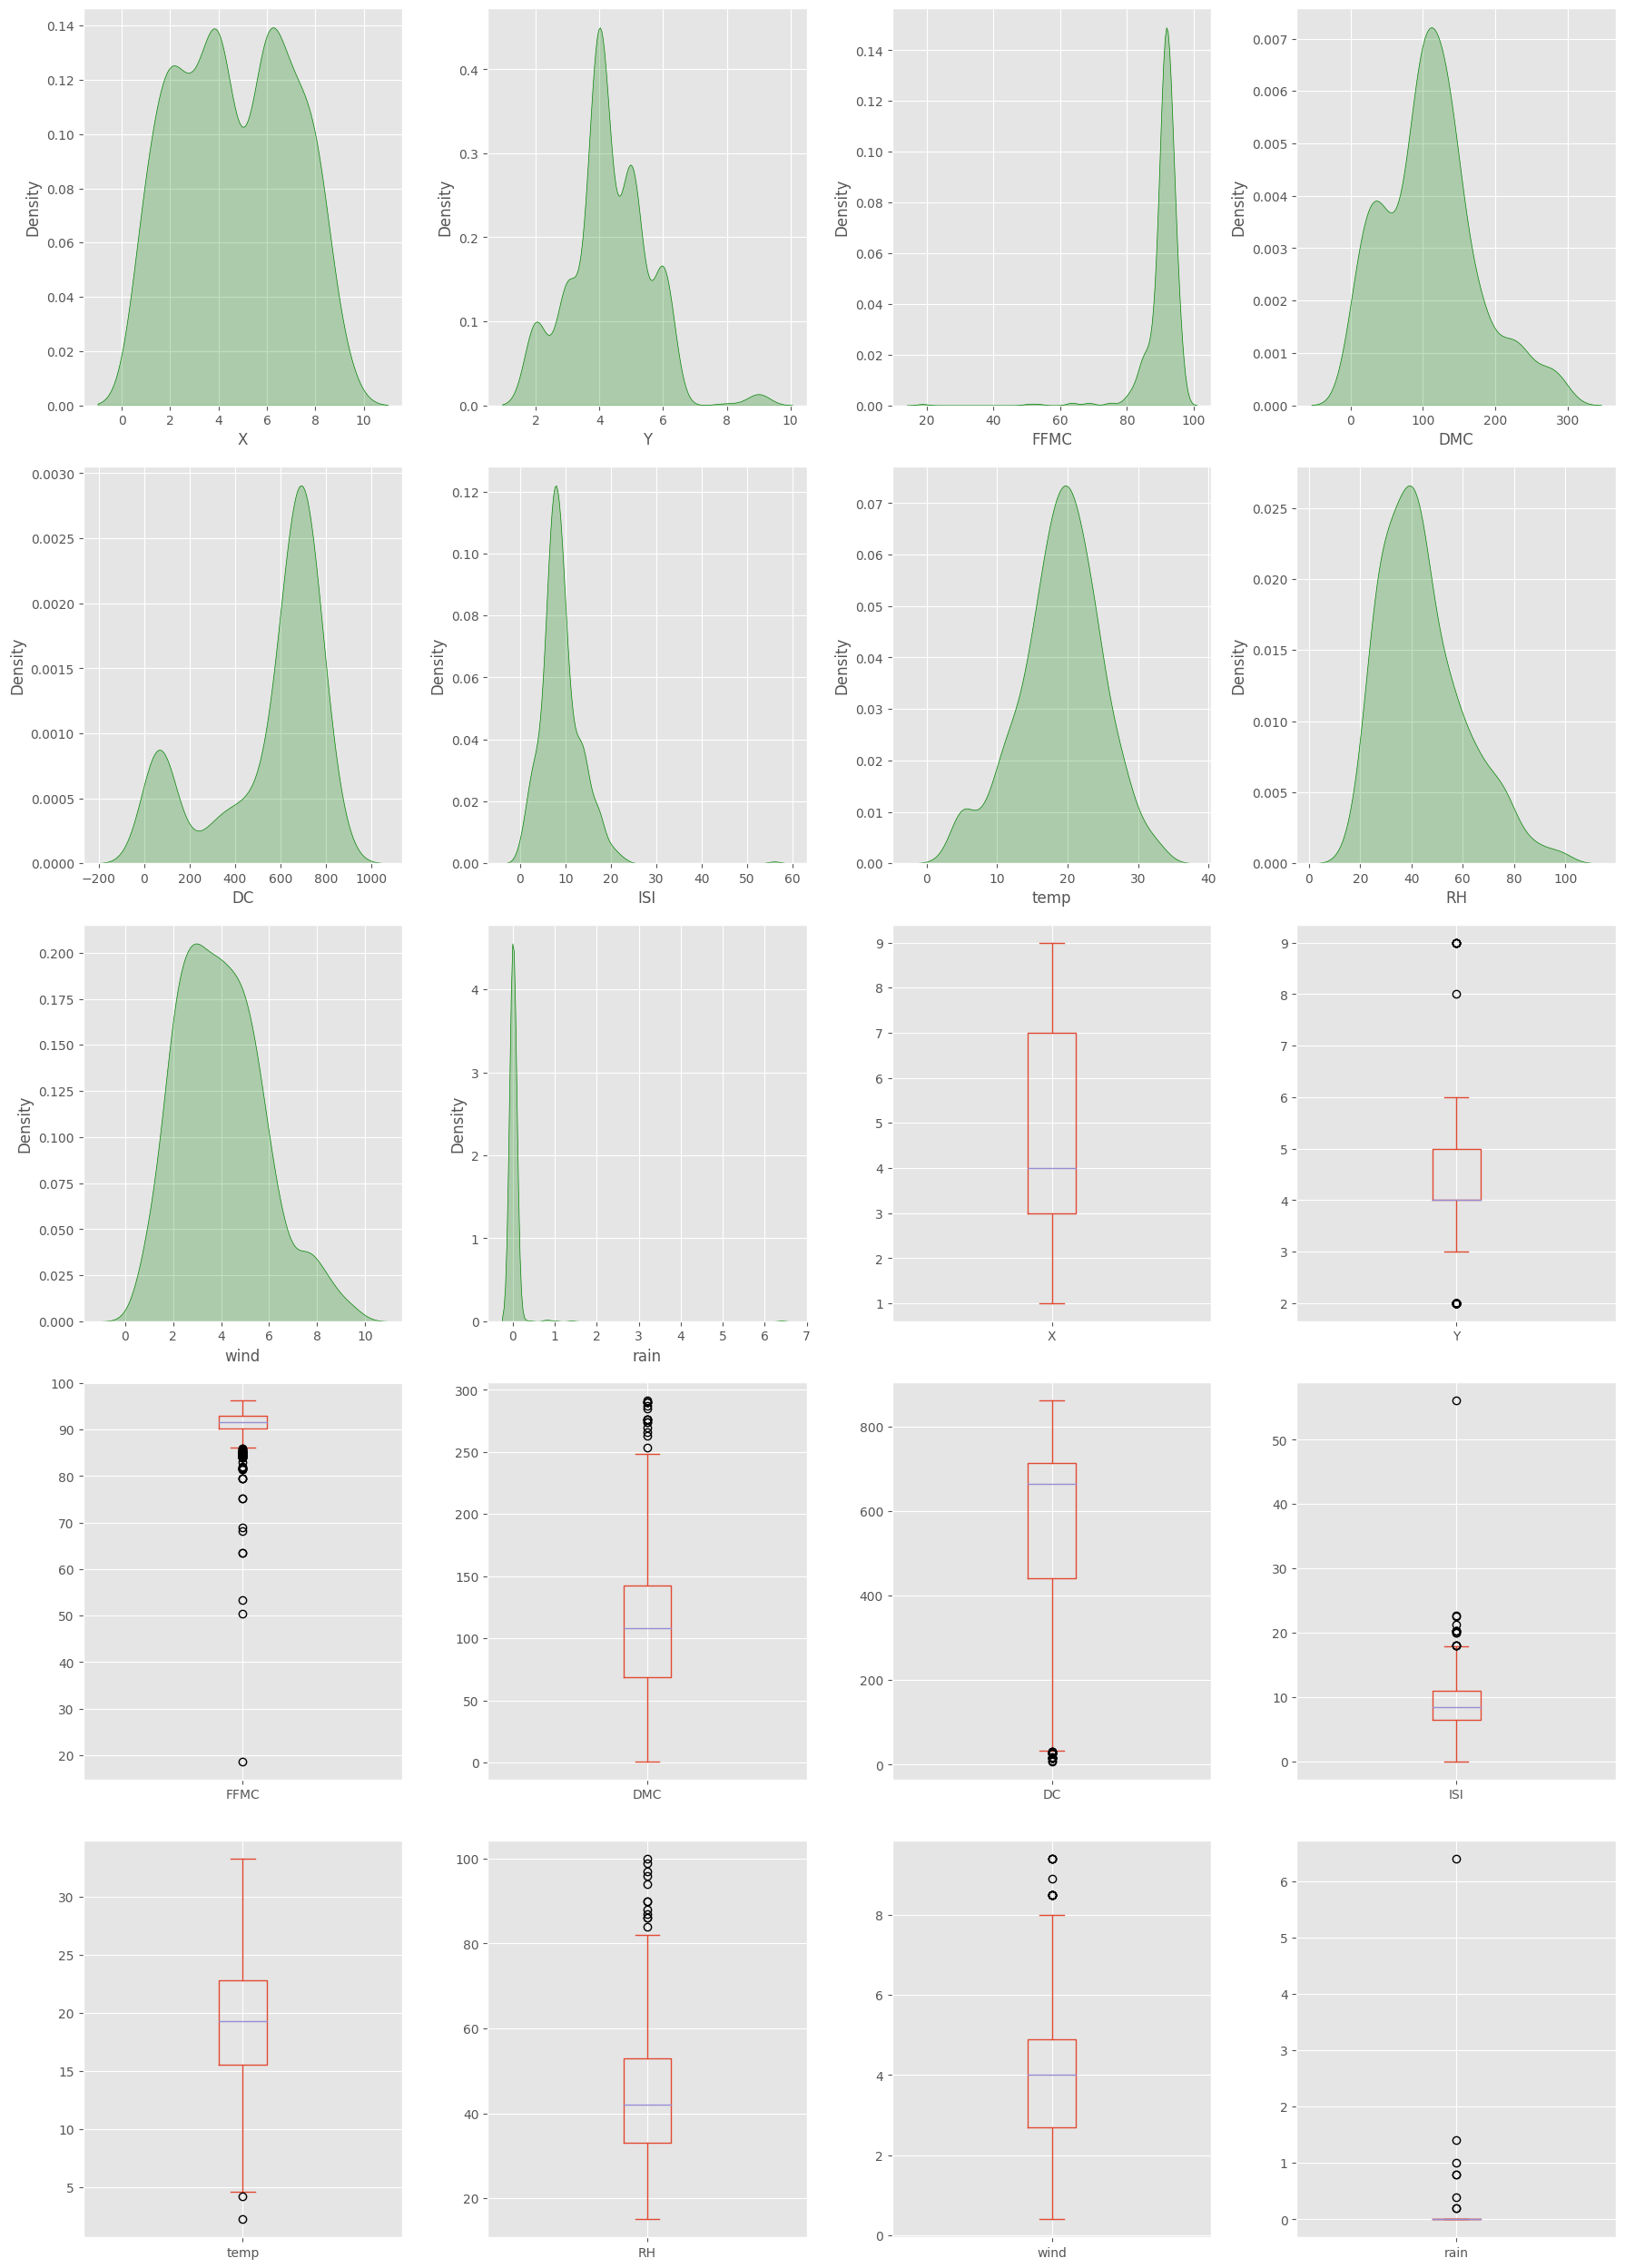

X         Y       FFMC       DMC        DC        ISI  \
skewness  0.025954  0.415768  -6.548903  0.545526 -1.111406   2.528218   
kurtosis -1.179535  1.430430  66.530072  0.193154 -0.216474  21.302313   

              temp        RH      wind        rain  
skewness -0.329215  0.854413  0.581191   19.739515  
kurtosis  0.113899  0.414890  0.052614  418.034830

In [26]:
plt.figure(figsize = (18, 40))

for i, col in enumerate(num_data, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(data_no_dup[col], color = 'g', shade = True)
    plt.subplot(8, 4, i + 10)
    data_no_dup[col].plot.box()

plt.tight_layout()
plt.show()
nums = data_no_dup[num_data]
pd.DataFrame(data=[nums.skew(), nums.kurtosis()], index = ['skewness', 'kurtosis'])

In [27]:
print(data_no_dup['area'].describe(), '\n')
print(y_outliers)

count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area  \
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88   
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53   

     log-area  
237  2.330170  
238  3.038159  
415  2.873483  
479  2.446428  


In [28]:
#(No damage), (low),(moderate), (high), (very high)

def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

data_no_dup['damage_category'] = data_no_dup['area'].apply(area_cat)
data_no_dup.sample(5)

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
242  2  4   aug  sun  94.2  122.3  589.9  12.9  15.4  66   4.0   0.0  10.13   
151  9  9   jul  sun  90.1   68.6  355.2   7.2  24.8  29   2.2   0.0   1.36   
145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22   4.0   0.0   0.90   
177  2  5   aug  sun  90.2   99.6  631.2   6.3  19.2  44   2.7   0.0   4.69   
59   2  2   feb  fri  86.6   13.2   43.0   5.3  12.3  51   0.9   0.0   0.00   

     log-area damage_category  
242  1.046495        moderate  
151  0.372912        moderate  
145  0.278754             low  
177  0.755112        moderate  
59   0.000000       No damage

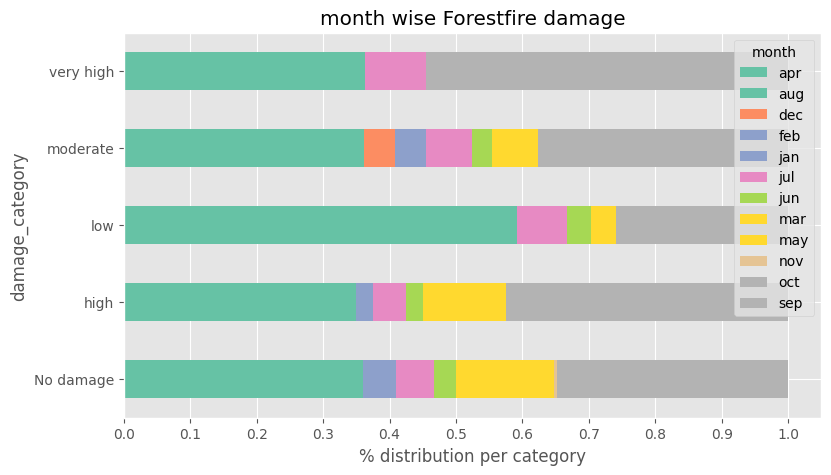

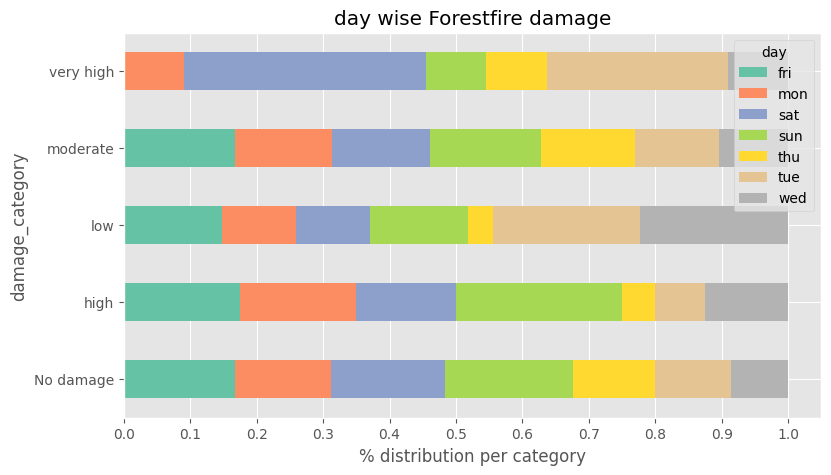

In [42]:
# categorical columns
for col in cat_data:
    cross = pd.crosstab(index = data_no_dup['damage_category'], columns = data_no_dup[col], normalize = 'index')
    cross.plot.barh(stacked = True,rot = 0,cmap = 'Set2')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title("{} wise Forestfire damage".format(col))
plt.show()

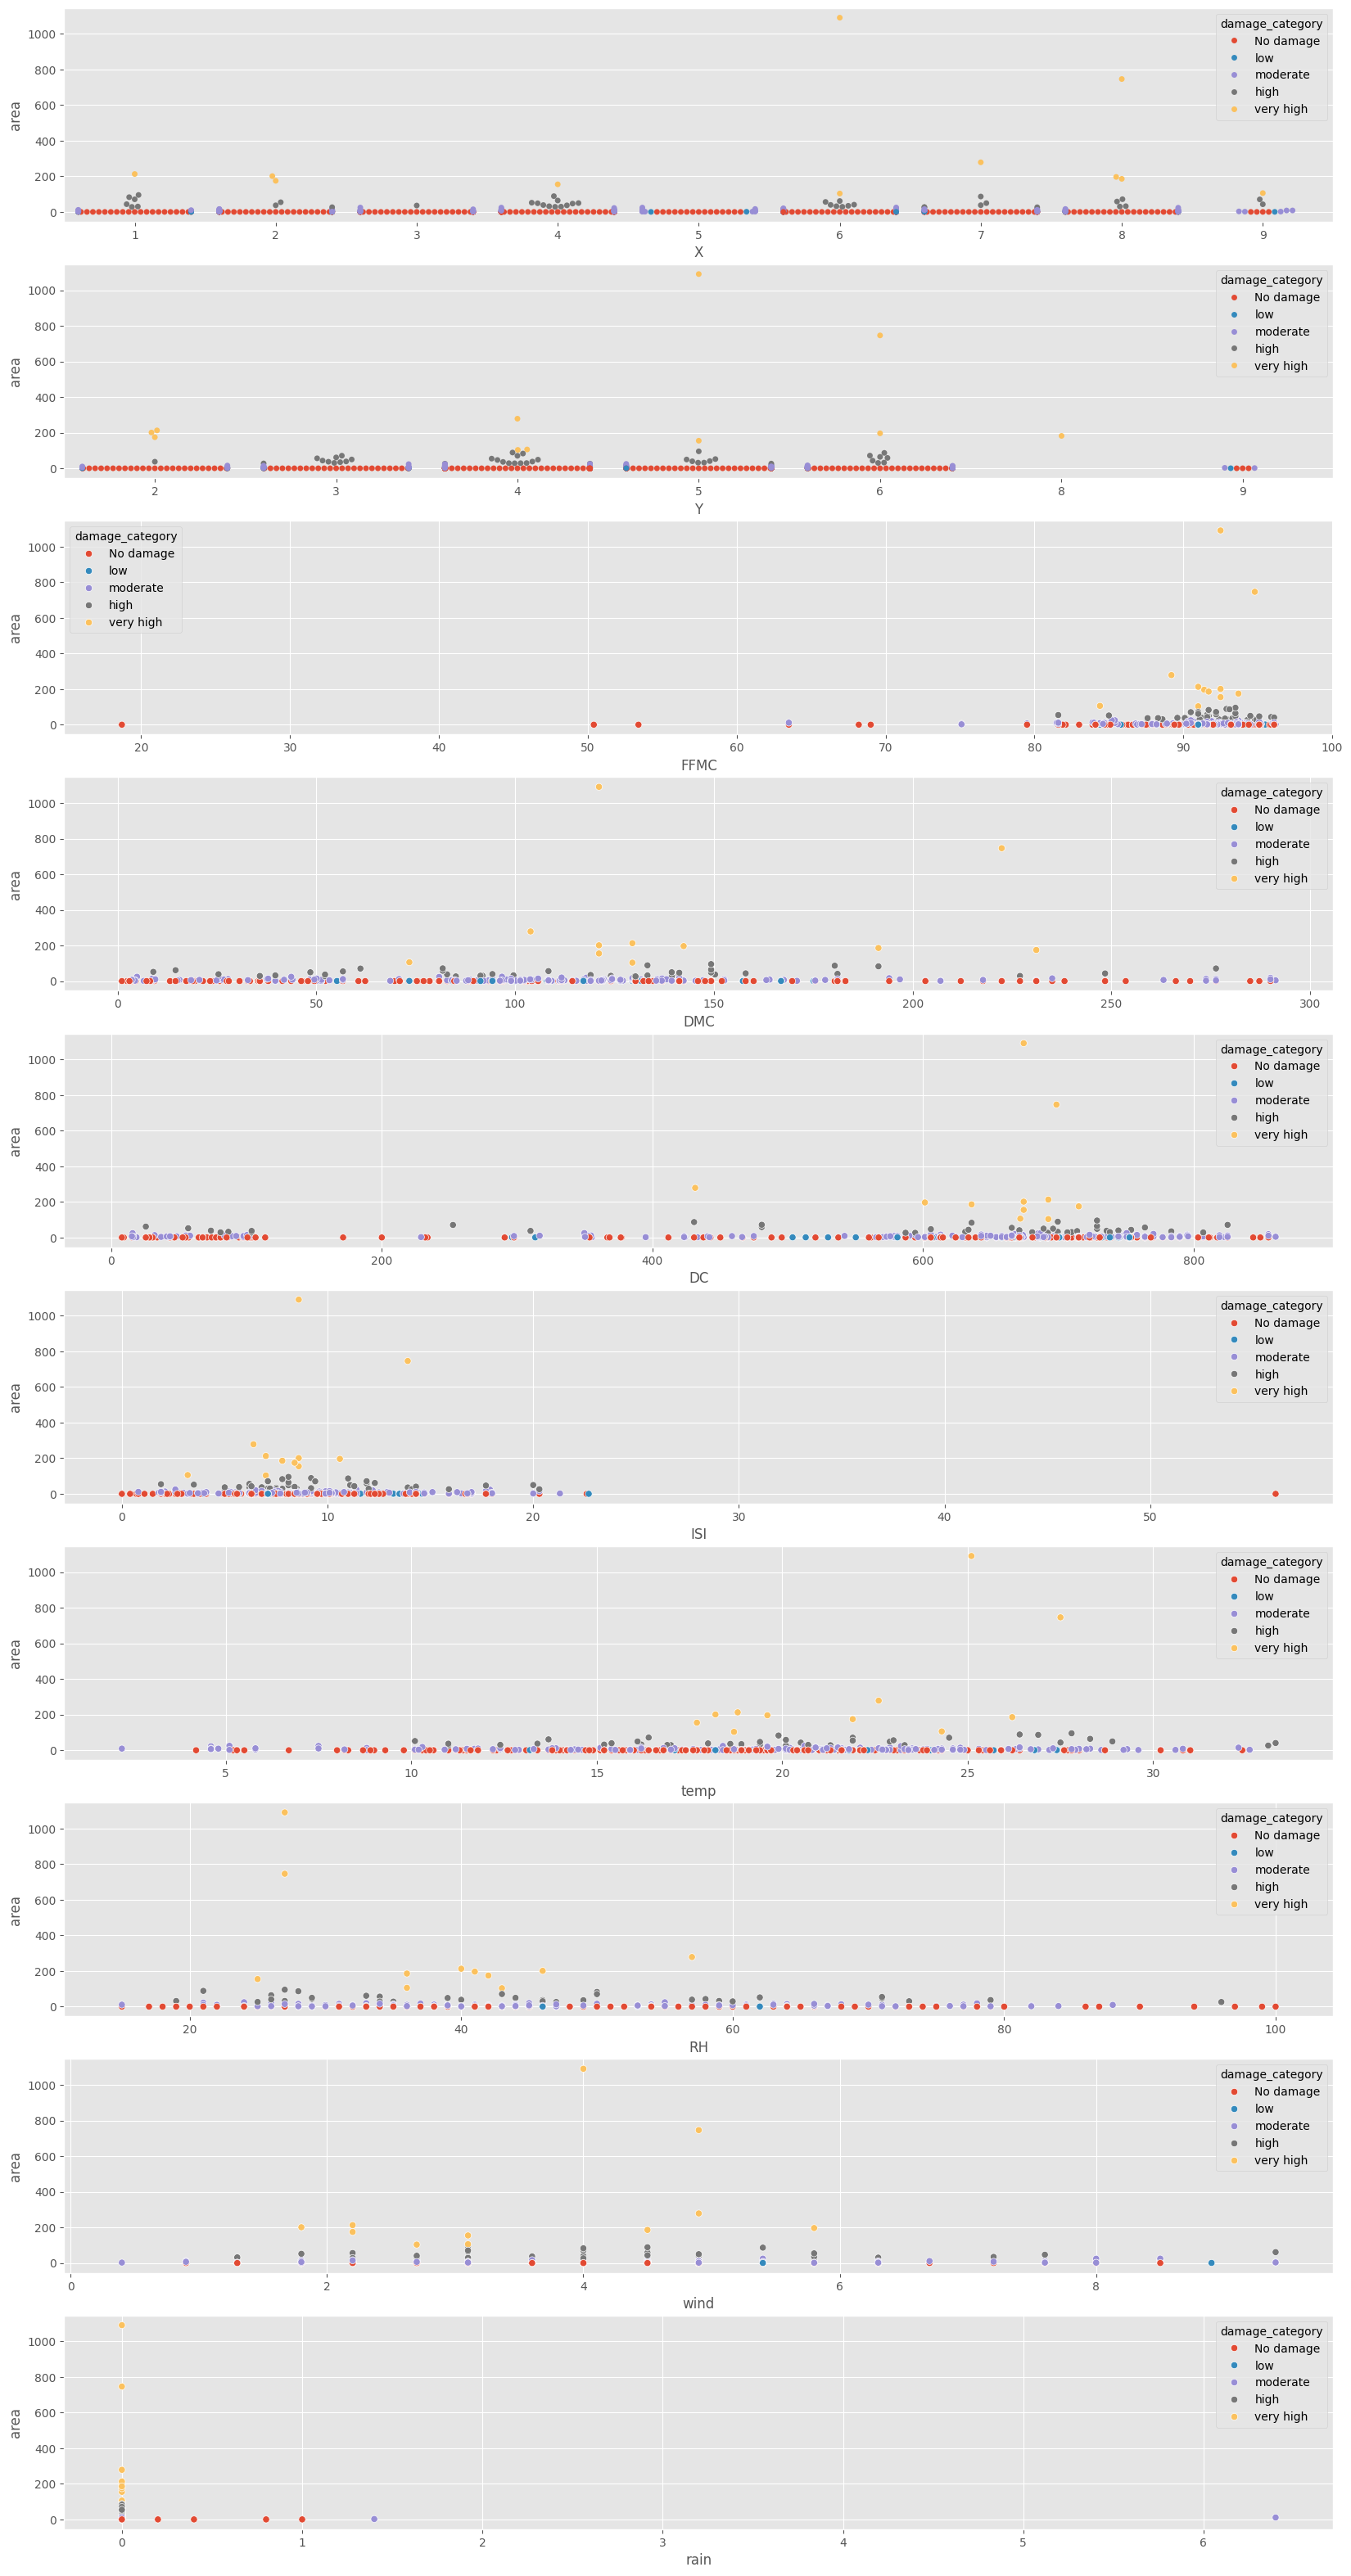

In [30]:
# numerical columns
plt.figure(figsize = (20, 40))
for i,col in enumerate(num_data, 1):
    plt.subplot(10, 1, i)
    if col in ['X', 'Y']:
        sns.swarmplot(data = data_no_dup, x = col, y = 'area', hue = 'damage_category')
    else:
        sns.scatterplot(data = data_no_dup, x = col,y = 'area',hue = 'damage_category')
plt.show()

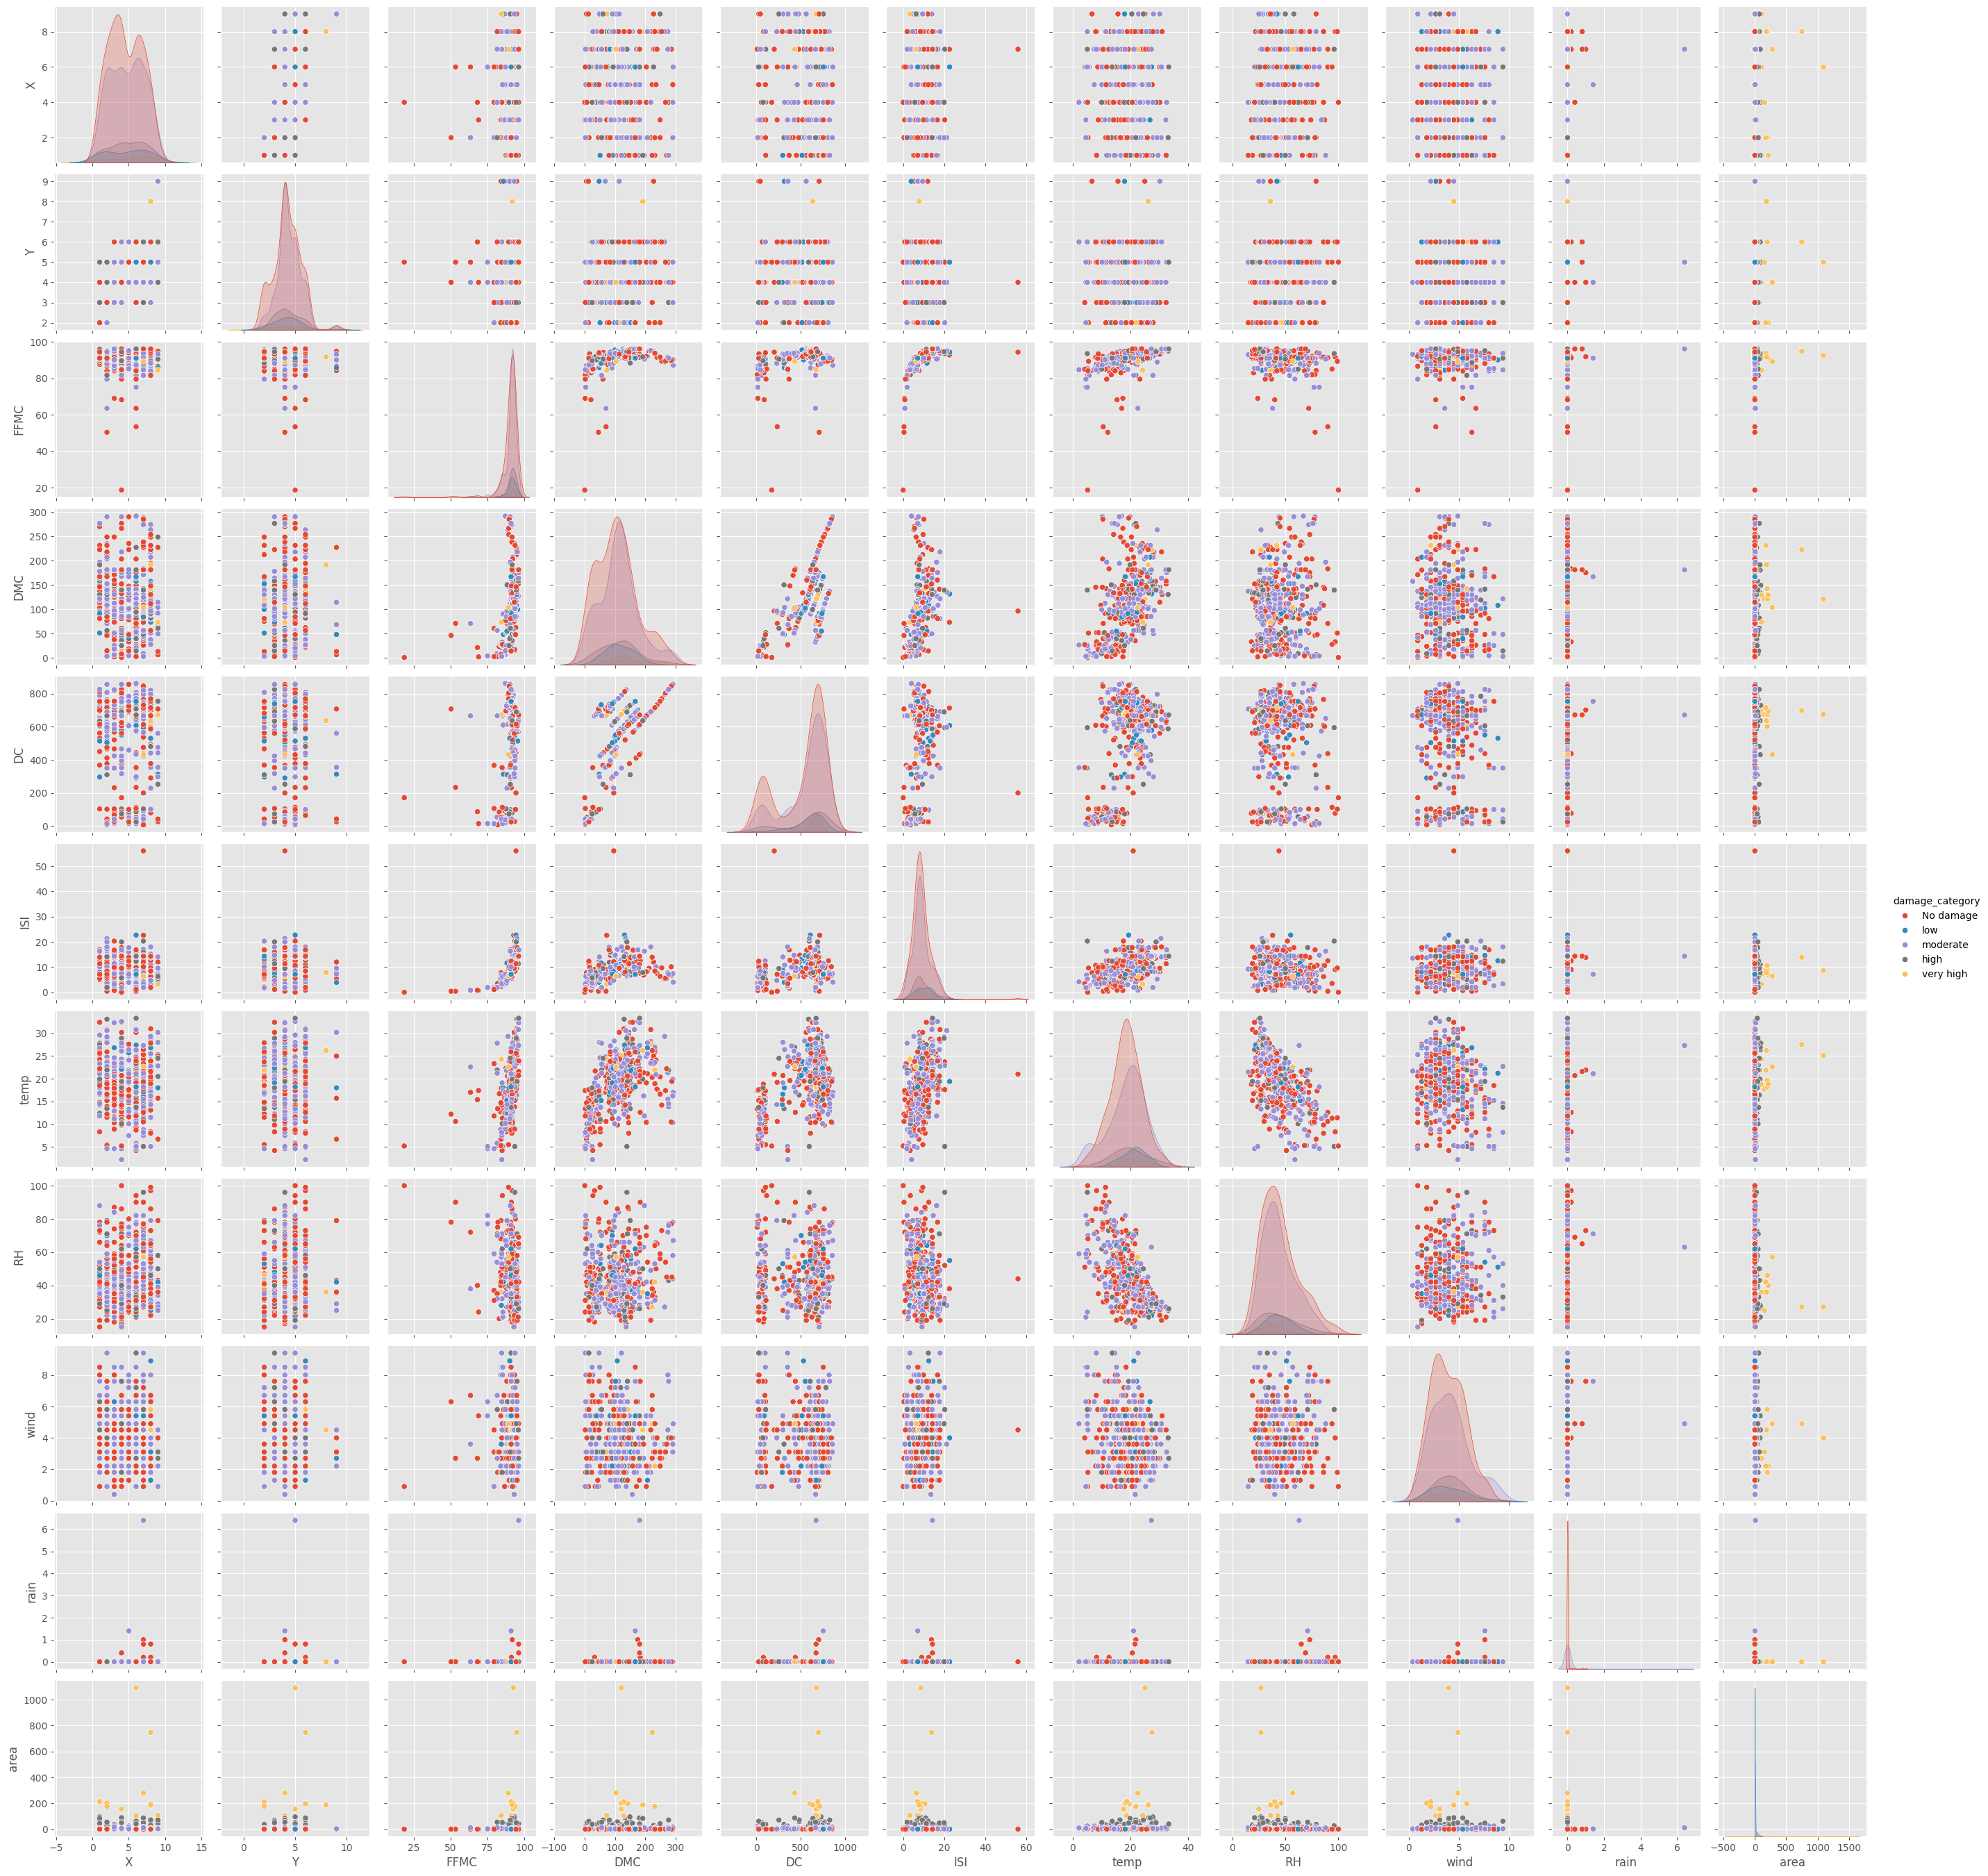

In [31]:
selected_features = data_no_dup.drop(columns = ['damage_category', 'day', 'month', 'log-area']).columns
sns.pairplot(data_no_dup, hue = 'damage_category', vars = selected_features)
plt.show()

In [32]:
out_columns = ['area','FFMC','ISI','rain']
df = pd.get_dummies(data_no_dup, columns=['day','month'], drop_first = True)

print(np.log1p(df[out_columns]).skew())
print('-'*20)
print(np.log1p(df[out_columns]).kurtosis())

area     1.219398
FFMC   -11.630232
ISI     -0.931885
rain    14.117710
dtype: float64
--------------------
area      0.961880
FFMC    184.053886
ISI       2.546805
rain    232.413847
dtype: float64


In [33]:
mask = df.loc[:, ['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

df = df[mask.values]
df.shape

(506, 30)

In [34]:
out_columns.remove('rain')
df[out_columns] = np.log1p(df[out_columns])
df[out_columns].skew()

area    1.210025
FFMC   -1.794148
ISI    -0.431279
dtype: float64

In [35]:
# we will use this dataframe for building our ML model
df_ml = df.drop(columns = ['damage_category']).copy()
df_ml.head()

X  Y      FFMC   DMC     DC       ISI  temp  RH  wind  rain  ...  \
0  7  5  4.468204  26.2   94.3  1.808289   8.2  51   6.7     0  ...   
1  7  4  4.517431  35.4  669.1  2.041220  18.0  33   0.9     0  ...   
2  7  4  4.517431  43.7  686.9  2.041220  14.6  33   1.3     0  ...   
3  8  6  4.529368  33.3   77.5  2.302585   8.3  97   4.0     1  ...   
4  8  6  4.503137  51.3  102.2  2.360854  11.4  99   1.8     0  ...   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False       True   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False       True   
4      False      False      False      False      False       True   

   month_may  month_nov  month_oct  month_sep  
0      False      False      False      False  
1      False      False       True      False  
2      False      False       True      False  
3      False      False      False      False  
4      False      False      False      False  

[5 rows x 29 columns]

# model building

In [36]:
inputs = df_ml.drop(['area', 'log-area'], axis = 1)
target = df_ml['log-area']
inputs.shape

(506, 27)

In [37]:
# split data into training set and testin set
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25, random_state = 42)
x_train.shape, x_test.shape

((379, 27), (127, 27))

In [38]:
# Defining REC (regression error charcteristics)
def rec(m, n, tol):
    if type(m) != 'numpy.ndarray':
        m = np.array(m)
    if type(n) != 'numpy.ndarray':
        n = np.array(n)

    l = m.size       #Assigning m.size to l
    percent = 0
    for i in range(l):
        if np.abs(10 ** m[i] - 10 ** n[i]) <= tol:
            percent += 1
    return 100 * (percent / l)

## RF Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 10, 15], 'max_leaf_nodes': [2, 5], 'min_samples_leaf': [2, 5],
    'min_samples_split':[2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid = params, refit = True, verbose = 0, cv = 5)
grid_rf.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters obtained by Grid Search:",grid_rf.best_params_)

In [ ]:
from sklearn.metrics import mean_squared_error

a = grid_rf.predict(x_test)
print("RMSE for Random Forest:",  np.sqrt(mean_squared_error(y_test, a)))

In [ ]:
# Scatter plot to show actual area burned and error
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10 ** (y_test), 10 ** (a) - 10 ** (y_test))

In [ ]:
rec_RF=[]
for i in range(20):
    rec_RF.append(rec(a, y_test, i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize = 15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0, 20 + 1, 5)])
plt.ylim(-10, 100)
plt.yticks([i * 20 for i in range(6)])
plt.grid(True)
plt.plot(range(20), rec_RF)

## Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
rec_lm=[]
for i in range(20):
    rec_lm.append(rec(y_pred, y_test, i))

plt.figure(figsize=(5 ,5))
plt.title("REC curve for the Linear Regression\n",fontsize = 15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0, 20 + 1, 5)])
plt.ylim(-10, 100)
plt.yticks([i * 20 for i in range(6)])
plt.grid(True)
plt.plot(range(20), rec_RF)

## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

model = Sequential([
    keras.layers.Dense(100, input_dim = 27, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(1)
])
model.summary()

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = .001), loss = keras.losses.mse)
model.fit(x_train, y_train, epochs = 200, batch_size = 10)

In [ ]:
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

In [ ]:
rec_NN=[]
for i in range(20):
    rec_NN.append(rec(model.predict(x_test), y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curve for Neural Network\n",fontsize=16)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,20+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(20),rec_NN)

In [ ]:
### Relative performance of random forest and nn
plt.figure(figsize=(10, 8))
plt.title("REC curve for RFR and NN\n",fontsize = 20)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize = 15)
plt.ylabel("Percentage of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,20+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,20)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(20),rec_RF,'--',lw=3)
plt.plot(range(20),rec_NN,'-',lw=3)
plt.legend(['Random Forest','NN'],fontsize=13)

## XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1, booster = 'gbtree',
                         verbosity = 0, nthread = -1,
                          random_state = 1337)
params = {
    'min_child_weight': [None, 1, 5, 10],
    'gamma': [None, 0.1, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1, 2, 3, 4, 5]
}
gs_xg = GridSearchCV(xgb_model , param_grid = params, n_jobs = -1, cv = 5,
                  verbose = 0)
gs_xg.fit(x_train, y_train)

In [ ]:
gs_xg.best_params_

In [ ]:
a = gs_xg.predict(x_test)
print("RMSE for XGBoost:",  np.sqrt(mean_squared_error(y_test, a)))

## SVM

In [ ]:
from sklearn.svm import SVR
params = [
    {'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
    },
    {
    'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['linear', 'sigmoid'],
    }
]
gs_svc = GridSearchCV(SVR(),param_grid = params, n_jobs = -1, cv = 10,
                  verbose = 0)
gs_svc.fit(x_train, y_train)

In [ ]:
gs_svc.best_params_

In [ ]:
import matplotlib.pyplot as plt

# Comparing and finding out the best model

plt.figure(figsize=(10, 8))
plt.title("REC curve for RFR, NN, and XGBoost\n", fontsize=20)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)", fontsize=15)
plt.ylabel("Percentage of correct prediction", fontsize=15)
plt.xticks([i for i in range(0, 20 + 1, 1)], fontsize=13)
plt.ylim(-10, 100)
plt.xlim(-2, 20)
plt.yticks([i * 20 for i in range(6)], fontsize=18)
plt.grid(True)
plt.plot(range(20), rec_RF, '--', lw=3)
plt.plot(range(20), rec_NN, '-', lw=3)

# Calculate REC for XGBoost
rec_xgb = []
for i in range(20):
    rec_xgb.append(rec(a, y_test, i))  # Assuming 'a' is the XGBoost prediction

plt.plot(range(20), rec_xgb, '-.', lw=3)

plt.legend(['Random Forest', 'NN', 'XGBoost'], fontsize=13)
plt.show()

# Compare RMSE values for all models
print("RMSE for Random Forest:", np.sqrt(mean_squared_error(y_test, a)))  # 'a' is the prediction from Random Forest
print('RMSE for Linear Regression: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"RMSE for Neural Network: {np.sqrt(mean_squared_error(y_test, model.predict(x_test)))}")
print(f"RMSE for XGBoost: {np.sqrt(mean_squared_error(y_test, a))}")
print(f"RMSE for SVM: {np.sqrt(mean_squared_error(y_test, gs_svc.predict(x_test)))}")

In [ ]:
import requests

# Replace with your WeatherAPI.com key
API_KEY = "f3b6e039e0c1484ea4d45503251702"

# Set location (You can replace with latitude & longitude if needed)
LOCATION = "Montesinho Natural Park"  # Example: You can change it to your target location

# WeatherAPI endpoint for hourly forecast
url = f"http://api.weatherapi.com/v1/forecast.json?key={API_KEY}&q={LOCATION}&hours=2"

# Send API request
response = requests.get(url)
data = response.json()

# Check if the request was successful
if "forecast" in data:
    hourly_forecast = data["forecast"]["forecastday"][0]["hour"][:2]  # Get next 2 hours

    for hour in hourly_forecast:
        time = hour["time"]
        temp = hour["temp_c"]
        humidity = hour["humidity"]
        wind_speed = hour["wind_kph"]
        rain = hour["precip_mm"]

        print(f"Time: {time}")
        print(f"Temperature: {temp}°C")
        print(f"Humidity: {humidity}%")
        print(f"Wind Speed: {wind_speed} km/h")
        print(f"Rain: {rain} mm")
        print("-" * 30)

else:
    print("Error fetching weather data. Check your API key and location.")


In [ ]:
import datetime

API_KEY = "f3b6e039e0c1484ea4d45503251702"

# Set location (You can replace with latitude & longitude if needed)
LOCATION = "Montesinho Natural Park"


# WeatherAPI endpoint for hourly forecast
url = f"http://api.weatherapi.com/v1/forecast.json?key={API_KEY}&q={LOCATION}&days=1"

# Send API request
response = requests.get(url)
data = response.json()

# Check if the request was successful
if "forecast" in data:
    hourly_forecast = data["forecast"]["forecastday"][0]["hour"][:2]  # Get next 2 hours

    for hour in hourly_forecast:
        time_str = hour["time"]
        temp = hour["temp_c"]
        humidity = hour["humidity"]
        wind_speed = hour["wind_kph"]
        rain = hour["precip_mm"]

        # Convert the time string to a datetime object
        time_obj = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M")

        # Extract day of the week and month
        day_of_week = time_obj.strftime("%A")
        month_of_year = time_obj.strftime("%B")

        print(f"Time: {time_str}")
        print(f"Temperature: {temp}°C")
        print(f"Humidity: {humidity}%")
        print(f"Wind Speed: {wind_speed} km/h")
        print(f"Rain: {rain} mm")
        print(f"Day of the week: {day_of_week}")
        print(f"Month of the year: {month_of_year}")
        print("-" * 30)

else:
    print("Error fetching weather data. Check your API key and location.")


In [ ]:
import pandas as pd


# Create an empty list to store the numerical data
numerical_data = []

# Iterate through the hourly forecast
for hour in hourly_forecast:
    numerical_data.append({
        'temp': hour["temp_c"],
        'humidity': hour["humidity"],
        'wind_speed': hour["wind_kph"],
        'rain': hour["precip_mm"]
    })

# Create a pandas DataFrame from the numerical data
weather_df = pd.DataFrame(numerical_data)

weather_df


In [ ]:
import math

def calculate_ffmc(temp, humidity, wind_speed, rain):
    # This is a simplified FFMC calculation, replace with actual formula
    ffmc = 85 + (temp * 0.5) - (humidity * 0.1) + (wind_speed * 0.05) - (rain * 0.2)
    return max(0, min(ffmc, 100))  # Ensure FFMC is between 0 and 100


def calculate_dmc(temp, humidity, rain):
    # Simplified DMC calculation
    dmc = 20 + (temp * 0.3) - (humidity * 0.05) - (rain * 0.1)
    return max(0, dmc) # DMC cannot be negative


def calculate_dc(temp, rain):
  dc = 100 + (temp*0.5)-(rain * 0.1)
  return max(0,dc)

def calculate_isi(wind_speed, ffmc):
    # Simplified ISI calculation
    isi = 0.2 * (0.923 * (wind_speed**0.5) * (1 + (0.18 * wind_speed)) * (0.023 * ffmc))
    return max(0,isi)


# Iterate through the first two rows of weather_df
for index, row in weather_df.head(2).iterrows():
  temp = row['temp']
  humidity = row['humidity']
  wind_speed = row['wind_speed']
  rain = row['rain']

  ffmc = calculate_ffmc(temp, humidity, wind_speed, rain)
  dmc = calculate_dmc(temp, humidity, rain)
  dc = calculate_dc(temp,rain)
  isi = calculate_isi(wind_speed, ffmc)

  print(f"Row {index+1}:")
  print(f"FFMC: {ffmc:.2f}")
  print(f"DMC: {dmc:.2f}")
  print(f"DC: {dc:.2f}")
  print(f"ISI: {isi:.2f}")
  print("-" * 20)
